In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

C:\Users\ayodh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'numpy' has no attribute 'MachAr'

In [11]:
df = pd.read_csv('daily_data.csv')

# df =  df.iloc[:21915]

df.tail(10)

,location_name,date,rainfall,station_name_niwa,agent_number
657440,Whangarei,2019-12-22,0.0,Whangarei Aero Aws,1287
657441,Whangarei,2019-12-23,0.0,Whangarei Aero Aws,1287
657442,Whangarei,2019-12-24,0.0,Whangarei Aero Aws,1287
657443,Whangarei,2019-12-25,0.0,Whangarei Aero Aws,1287
657444,Whangarei,2019-12-26,0.0,Whangarei Aero Aws,1287
657445,Whangarei,2019-12-27,0.0,Whangarei Aero Aws,1287
657446,Whangarei,2019-12-28,0.0,Whangarei Aero Aws,1287
657447,Whangarei,2019-12-29,0.0,Whangarei Aero Aws,1287
657448,Whangarei,2019-12-30,0.0,Whangarei Aero Aws,1287
657449,Whangarei,2019-12-31,0.0,Whangarei Aero Aws,1287


In [12]:
df.drop(columns=['station_name_niwa','agent_number'], inplace=True)
# df.set_index('date', inplace=True)
# df.sort_index(inplace=True)
df.head()

df.to_csv('rainfall2.csv')

In [113]:
# # Remove rows with NaN values and zeros in the 'RAINFALL' column
# reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
# reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

In [114]:
# # Remove rows with NaN values and zeros in the 'RAINFALL' column
# reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
# reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

# # Convert 'YEAR-MONTH' to datetime
# reshaped_df_cleaned['YEAR-MONTH'] = pd.to_datetime(reshaped_df_cleaned['YEAR-MONTH'], format='%Y-%b')

# # Filter the data for the chosen subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
# subdivision_data = reshaped_df_cleaned[reshaped_df_cleaned['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS']

# # Set 'YEAR-MONTH' as the index for time series analysis
# subdivision_data.set_index('YEAR-MONTH', inplace=True)

# # Sort the data based on the index (time series data should be sorted chronologically)
# subdivision_data.sort_index(inplace=True)


# rainfall_data = subdivision_data['RAINFALL']

In [115]:
rainfall_data = df

<AxesSubplot:xlabel='date'>

<Figure size 1440x288 with 0 Axes>

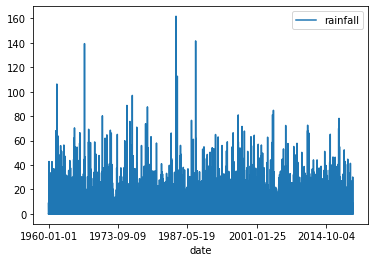

In [116]:
plt.figure(figsize=(20, 4)) 
rainfall_data.plot()

In [117]:
rainfall_data.dtypes

rainfall    float64
dtype: object

In [118]:
# import pandas as pd

# rainfall_data = pd.DataFrame(rainfall_data)
# rainfall_data.set_index('date', inplace=True)

# # Convert the date strings to Timestamp objects
# start_date = pd.to_datetime('1961-01-01')
# end_date = pd.to_datetime('2016-12-31')



# # Boolean indexing to remove the specified range
# rainfall_data = rainfall_data[(rainfall_data.index < start_date) | (rainfall_data.index >= end_date)]

# print(rainfall_data)


<AxesSubplot:xlabel='date'>

<Figure size 1440x576 with 0 Axes>

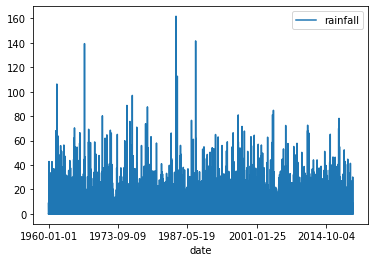

In [119]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

<AxesSubplot:xlabel='date'>

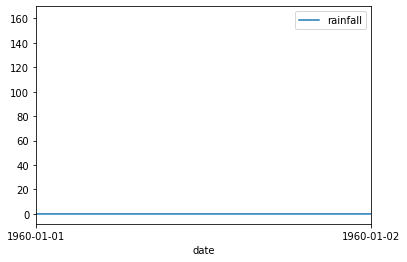

In [120]:
rainfall_data.plot(xlim=['2000-01-01','2015-12-31'])

<AxesSubplot:xlabel='date'>

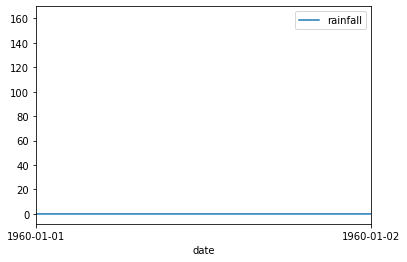

In [121]:
rainfall_data.plot(xlim=['2000-01-01','2000-12-31'])

In [122]:
rainfall_data.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=21915)

<AxesSubplot:xlabel='date'>

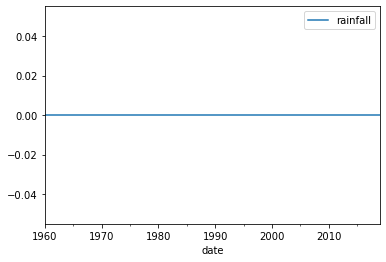

In [123]:
rainfall_data.index = pd.to_datetime(rainfall_data.index)

# Now you can use the resample method with the 'A' frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.plot()

<AxesSubplot:xlabel='date'>

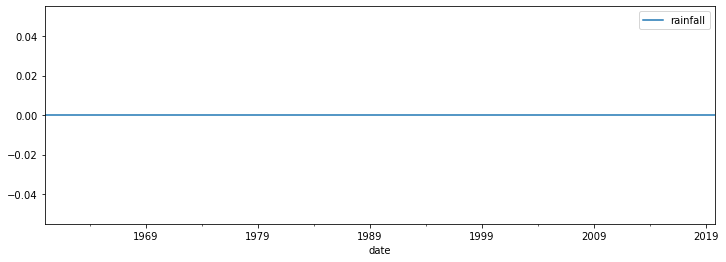

In [124]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
# rainfall_data_min_q.head(20)
rainfall_data_min_q.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

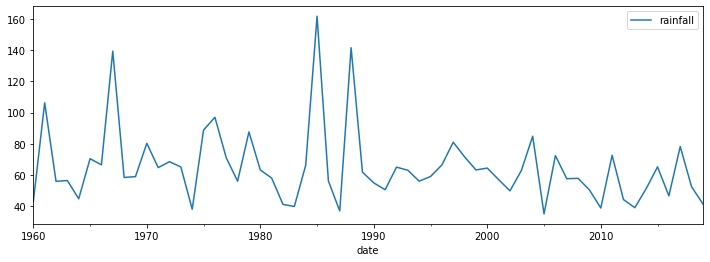

In [125]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

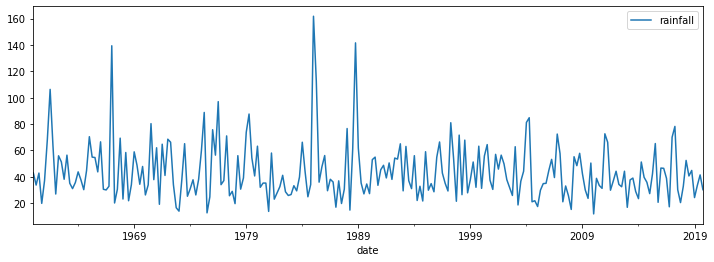

In [126]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

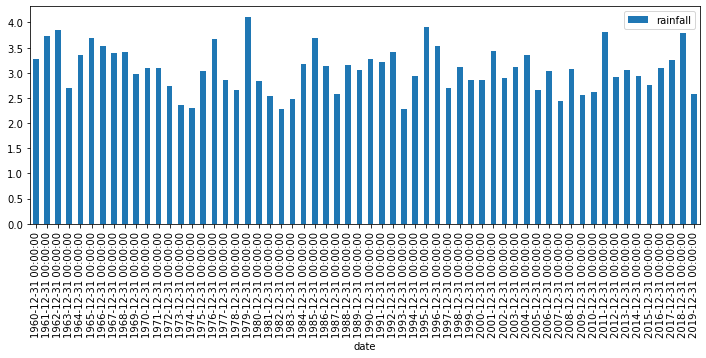

In [127]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [129]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['rainfall'].rolling(window=12,min_periods=1).mean()

In [130]:
rainfall_data_r.head()

,rainfall,1YR R
date,,
1960-01-01,0.0,0.000000
1960-01-02,0.0,0.000000
1960-01-03,9.2,3.066667
1960-01-04,0.0,2.300000
1960-01-05,0.0,1.840000


<AxesSubplot:xlabel='date'>

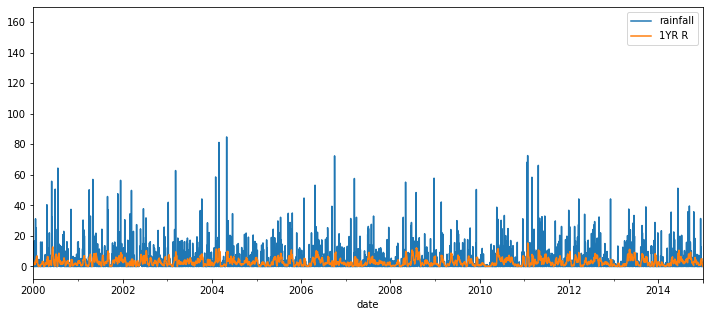

In [132]:
rainfall_data_r[['rainfall','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [134]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['rainfall'].expanding().mean()

<AxesSubplot:xlabel='date'>

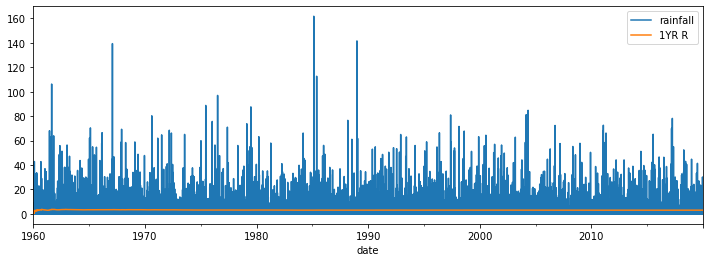

In [135]:
rainfall_data_cr.plot(figsize=(12,4))

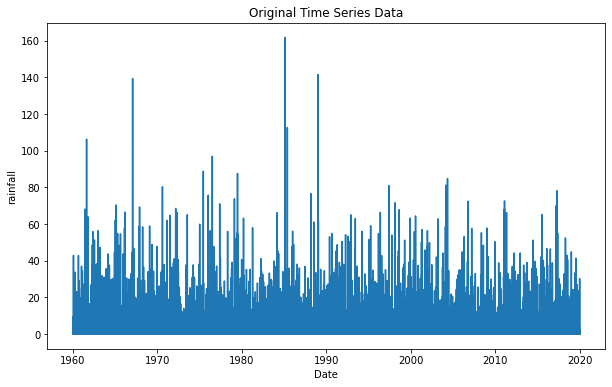

In [138]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['rainfall'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('rainfall')
plt.show()

In [140]:

# Perform Augmented Dickey-Fuller test
result = adfuller(rainfall_data['rainfall'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Test Results:
ADF Statistic: -24.816350129281485
p-value: 0.0
Critical Values:
   1%: -3.4306488242319357
   5%: -2.8616720704350085
   10%: -2.5668402973748923
Reject the null hypothesis. Data is stationary.


<Figure size 1440x1080 with 0 Axes>

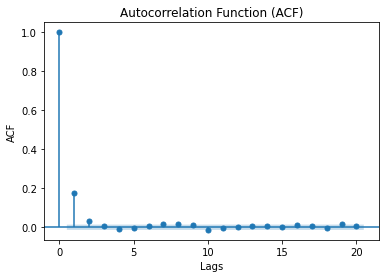

<Figure size 1440x1080 with 0 Axes>

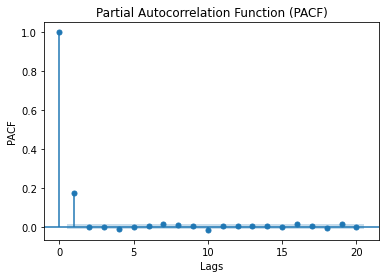

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming rainfall_data is a DataFrame with datetime-based index and multiple columns
# For example, selecting a specific column 'rainfall_column' for analysis
rainfall_column = rainfall_data['rainfall']  # Replace 'column_name' with the actual column name

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_column, lags=20)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_column, lags=20)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [151]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2010,12,1)

In [152]:
train_data=rainfall_data[:train_dataset_end]
test_data=rainfall_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [154]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [155]:
test_data

,rainfall,1YR R
date,,
2000-12-02,0.0,3.096514
2000-12-03,4.0,3.096575
2000-12-04,5.2,3.096715
2000-12-05,0.0,3.096508
2000-12-06,5.6,3.096676
...,...,...
2010-11-27,0.0,3.060439
2010-11-28,0.0,3.060274
2010-11-29,0.0,3.060110


In [159]:
import pandas as pd
import statsmodels.api as sm

# Assuming rainfall_data is a DataFrame with datetime-based index
rainfall_column = rainfall_data['rainfall']  # Replace with the actual column name

# Check data stationarity and perform differencing if necessary
# Example: First-order differencing
differenced_data = rainfall_column.diff().dropna()

# Create a Seasonal ARIMA model (SARIMA)
order = (1, 1, 10)  # p, d, q
seasonal_order = (6, 0, 1, 12)  # P, D, Q, S (seasonal)
model_sarima = sm.tsa.SARIMAX(differenced_data, order=order, seasonal_order=seasonal_order)
model_sarima_fit = model_sarima.fit()

# Print model summary
print(model_sarima_fit.summary())


# ## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA

# # p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

# model_ARIMA=ARIMA(rainfall_data['rainfall'],order=(2,0,2))
# model_Arima_fit=model_ARIMA.fit()
# model_Arima_fit.summary()

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                       SARIMAX Results                                       
Dep. Variable:                              rainfall   No. Observations:                21914
Model:             SARIMAX(1, 1, 10)x(6, 0, [1], 12)   Log Likelihood              -74668.162
Date:                               Mon, 28 Aug 2023   AIC                         149374.323
Time:                                       00:11:32   BIC                         149526.225
Sample:                                   01-02-1960   HQIC                        149423.802
                                        - 12-31-2019                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9993      0.000  -5147.850      0.000      -1.000      -0.999
ma.L1      

In [160]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2000-12-02 00:00:00
2010-12-01 00:00:00


In [161]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['rainfall']-pred

NameError: name 'model_Arima_fit' is not defined

In [ ]:
pred

In [ ]:
residuals

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

In [ ]:
test_data[['rainfall','Predicted_ARIMA']].plot()